In [92]:
import matplotlib.pyplot as plt
import requests
import pandas as pd

### Korea CDC URL

In [93]:
url = 'http://www.cdc.go.kr/npt/biz/npp/iss/influenzaListAjax.do'

> ### by year (delete intoDivi)

In [116]:
params = {
    'icdNm': 'influenza',
    'startYear': '2019',  # from 
    'endYear': '2020',  # to 
    'age': "",
    'ageText': '전체'  # age total
}

> ### by age (include intoDivi)

In [109]:
# params = {
#     'icdNm': 'influenza',
#     'startYear': '2019',  # from 
#     'endYear': '2020',  # to
#     'age': "",
#     'intoDivi': 1,
#     'ageText': '전체'  # age total
# }

In [117]:
response = requests.post(url, params)
response

<Response [200]>

> ### json type
- `'intoDivi': 1` add to the parameter, you get data by age.
- `'intoDivi': 1` take out of the parameter, you get year-by-year data.

> #### data by age

In [118]:
datas = response.json()

In [119]:
df0bj = pd.DataFrame(datas)

ValueError: arrays must all be same length

In [120]:
df0bj

,COLUMN14,COLUMN38,COLUMN13,LV,COLUMN37,COLUMN16,COLUMN36,COLUMN15,COLUMN35,COLUMN18,...,COLUMN42,COLUMN45,COLUMN44,COLUMN41,COLUMN40,COLUMN7,COLUMN6,COLUMN9,TITLE,COLUMN8
0,6.9,,7,1,,12.7,,9.5,,19.6,...,,,,,,1.2,2.8,3,0세,2.5
1,25.2,,18,2,,47.7,,34.1,,53.6,...,,,,,,6.2,5.6,8.4,1-6세,6.7
2,59.5,,35.2,4,,102.2,,87.9,,113.2,...,,,,,,6.7,5.5,11.6,7-12세,7.2
3,21.4,,20.7,5,,61.3,,38.8,,93.6,...,,,,,,6.1,3.1,5.8,13-18세,4.5
4,17,,9.4,7,,35.4,,24.3,,55.1,...,,,,,,6.7,5.6,5.1,19-49세,4.9
5,7.5,,4.6,8,,16.4,,13.1,,30,...,,,,,,3.2,3.2,3,50-64세,2.6
6,3.4,,2.2,9,,6,,5.1,,13.2,...,,,,,,0.7,1.4,1.7,65세 이상,1.2


In [121]:
datas['data'][0]

{'COLUMN14': '19.5',
 'COLUMN38': '',
 'COLUMN13': '12.7',
 'COLUMN37': '',
 'COLUMN16': '37.8',
 'COLUMN36': '',
 'COLUMN15': '28.5',
 'COLUMN35': '',
 'COLUMN18': '49.1',
 'COLUMN17': '49.8',
 'COLUMN19': '47.8',
 'COLUMN39': '',
 'COLUMN30': '',
 'COLUMN10': '7.0',
 'COLUMN34': '',
 'COLUMN33': '',
 'COLUMN12': '9.7',
 'COLUMN32': '',
 'COLUMN11': '8.2',
 'COLUMN31': '',
 'COLUMN25': '8.5',
 'COLUMN24': '11.6',
 'COLUMN27': '3.9',
 'COLUMN26': '6.3',
 'COLUMN29': '',
 'COLUMN28': '2.9',
 'COLUMN21': '40.9',
 'COLUMN20': '42.4',
 'COLUMN23': '16.4',
 'COLUMN22': '28.0',
 'COLUMN4': '3.8',
 'COLUMN5': '3.9',
 'COLUMN2': '3.6',
 'WEEKCNT': 0,
 'COLUMN3': '3.7',
 'COLUMN1': '3.4',
 'COLUMN52': '',
 'COLUMN51': '',
 'COLUMN50': '',
 'VALUE': '3.4`3.6`3.7`3.8`3.9`4.2`4.6`4.5`5.8`7.0`8.2`9.7`12.7`19.5`28.5`37.8`49.8`49.1`47.8`42.4`40.9`28.0`16.4`11.6`8.5`6.3`3.9`2.9````````````````````````',
 'COLUMN47': '',
 'COLUMN46': '',
 'COLUMN49': '',
 'COLUMN48': '',
 'COLUMN43': '',
 'COLUMN42': '

In [72]:
datas = datas['data']

AttributeError: 'list' object has no attribute 'head'

## Examples of data analysis by age

> ### Each week count is stored in VALUE and divided by age

In [73]:
datas

[{'COLUMN14': '6.9',
  'COLUMN38': '',
  'COLUMN13': '7',
  'LV': 1,
  'COLUMN37': '',
  'COLUMN16': '12.7',
  'COLUMN36': '',
  'COLUMN15': '9.5',
  'COLUMN35': '',
  'COLUMN18': '19.6',
  'COLUMN17': '17.6',
  'COLUMN19': '23.8',
  'COLUMN39': '',
  'COLUMN30': '',
  'COLUMN10': '5.1',
  'COLUMN34': '',
  'COLUMN33': '',
  'COLUMN12': '5.6',
  'COLUMN32': '',
  'COLUMN11': '4.3',
  'COLUMN31': '',
  'COLUMN25': '5.4',
  'COLUMN24': '7.3',
  'COLUMN27': '3.3',
  'COLUMN26': '4.5',
  'COLUMN29': '',
  'COLUMN28': '1',
  'COLUMN21': '18.9',
  'COLUMN20': '20.5',
  'COLUMN23': '7.6',
  'COLUMN22': '22.8',
  'COLUMN4': '2.1',
  'COLUMN5': '1.8',
  'COLUMN2': '1.4',
  'WEEKCNT': 0,
  'COLUMN3': '2.6',
  'COLUMN1': '2.9',
  'COLUMN52': '',
  'COLUMN51': '',
  'COLUMN50': '',
  'VALUE': '2.9`1.4`2.6`2.1`1.8`2.8`1.2`2.5`3`5.1`4.3`5.6`7`6.9`9.5`12.7`17.6`19.6`23.8`20.5`18.9`22.8`7.6`7.3`5.4`4.5`3.3`1````````````````````````',
  'COLUMN47': '',
  'COLUMN46': '',
  'COLUMN49': '',
  'COLUMN48': 

> ### by age

In [61]:
one = list(map(float, datas[0]['VALUE'].split("`")[:28]))
six = list(map(float, datas[1]['VALUE'].split("`")[:28]))
twleve = list(map(float, datas[2]['VALUE'].split("`")[:28]))
eightteen = list(map(float, datas[3]['VALUE'].split("`")[:28]))
fortynine = list(map(float, datas[4]['VALUE'].split("`")[:28]))
sixtyfour = list(map(float, datas[5]['VALUE'].split("`")[:28]))
after64 = list(map(float, datas[6]['VALUE'].split("`")[:28]))

> ### Graph by age

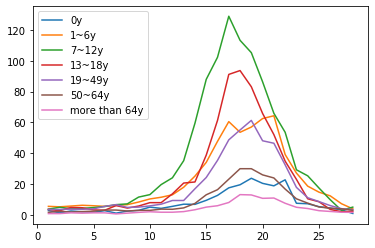

In [62]:
x = range(1, 29)
plt.plot(x, one, label = '0y')
plt.plot(x, six, label = '1~6y')
plt.plot(x, twleve, label = '7~12y')
plt.plot(x, eightteen, label = '13~18y')
plt.plot(x, fortynine, label = '19~49y')
plt.plot(x, sixtyfour, label = '50~64y')
plt.plot(x, after64, label = 'more than 64y')
plt.legend()
plt.show()